# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +28.92612699942                   -1.40    5.20s
  2   +20.04061908150        0.95       -0.83   10.7ms
  3   +14.31666975225        0.76       -0.46   10.6ms
  4   +10.45795617148        0.59       -0.34   10.5ms
  5   +9.767603529388       -0.16       -0.73   8.58ms
  6   +9.258756409513       -0.29       -0.75   8.73ms
  7   +8.775341609009       -0.32       -0.85   8.76ms
  8   +8.413667764129       -0.44       -0.91   8.72ms
  9   +8.223881054321       -0.72       -0.94   8.74ms
 10   +8.082845574275       -0.85       -1.03   8.72ms
 11   +8.078912272338       -2.41       -1.12   6.68ms
 12   +8.014353099888       -1.19       -0.99   51.8ms
 13   +7.912856519031       -0.99       -0.97   9.37ms
 14   +7.874587778934       -1.42       -1.04   6.87ms
 15   +7.842837612083       -1.50       -1.10   6.73ms
 16   +7.809399283641       -1.48       -1.30   6.71ms
 17   +7.79

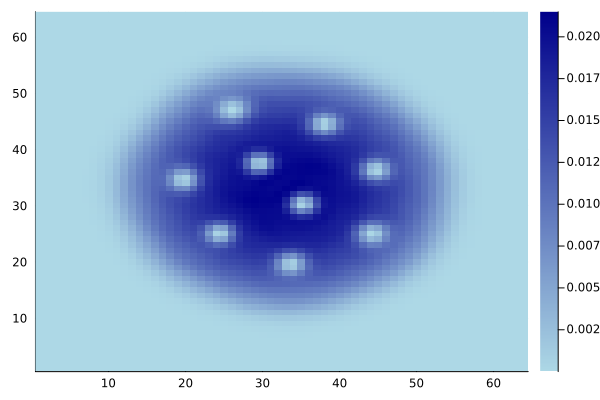

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)